# Autor: Filip Savić

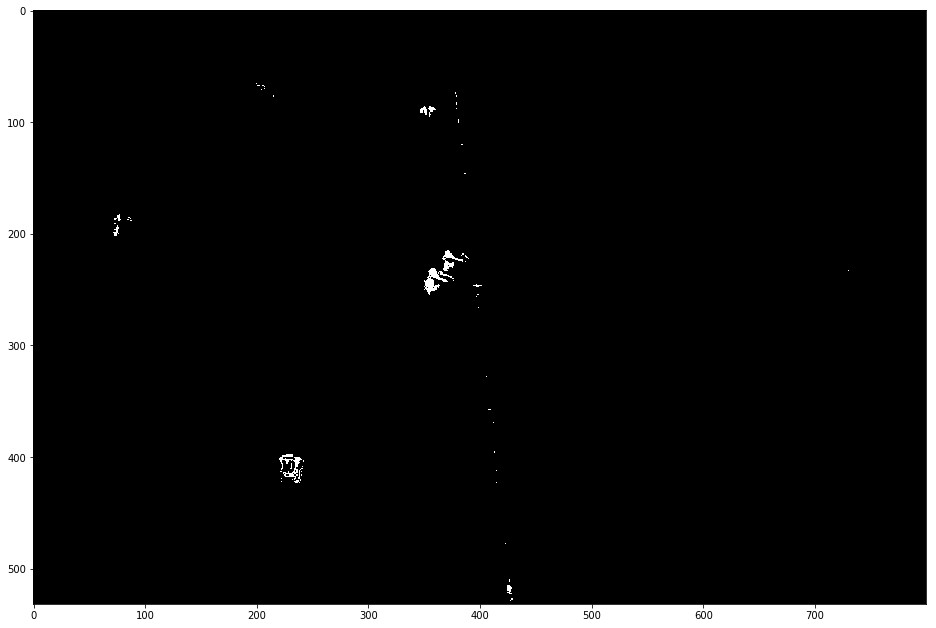

In [180]:
import matplotlib.pyplot as plt  
%matplotlib inline 

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16,12

import numpy as np
import cv2 # OpenCV biblioteka

img_football = cv2.cvtColor(cv2.imread('../slike/football.jpg'), cv2.COLOR_BGR2RGB)
img_football_gs = cv2.cvtColor(img_football, cv2.COLOR_RGB2GRAY)

#img_football_bin = cv2.adaptiveThreshold(img_football_gs, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY_INV, 25,  19)
ret, img_football_bin = cv2.threshold(img_football_gs, 225, 255, cv2.THRESH_BINARY)
plt.imshow(img_football_bin, 'gray')

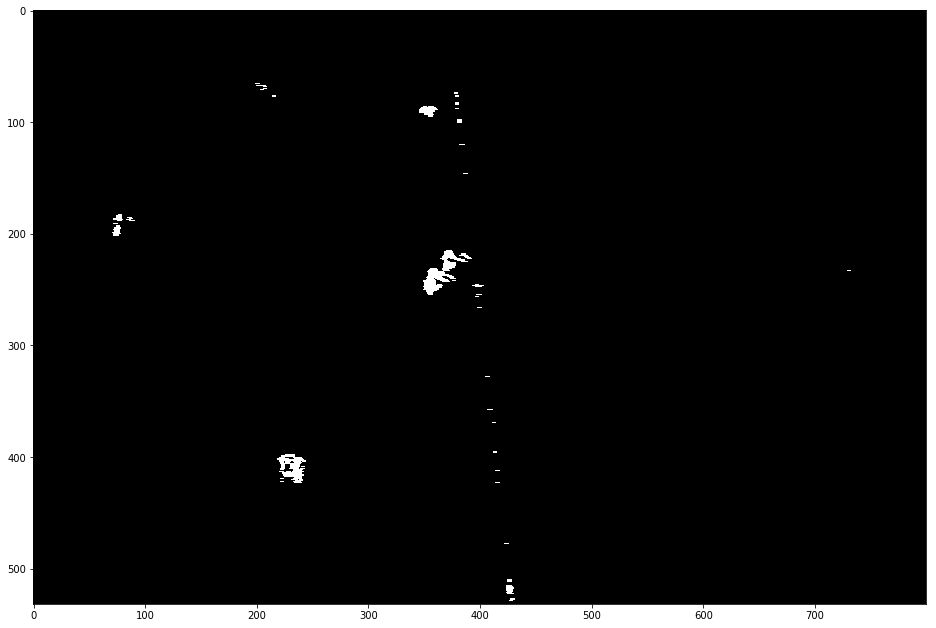

In [186]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 1))
img_ero = cv2.dilate(img_football_bin, kernel, iterations=1)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
#img_ero = cv2.erode(img_ero, kernel, iterations=2)

#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 1))
#img_ero = cv2.erode(img_football_bin, kernel, iterations=2)

#kernel = cv2.getStructuringElement(cv2.MORPH_OPEN, (3, 8))
#img_ero = cv2.dilate(img_ero, kernel, iterations=1)

plt.imshow(img_ero, 'gray')

Ukupan broj fudbalera u bijelim dresovima: 5


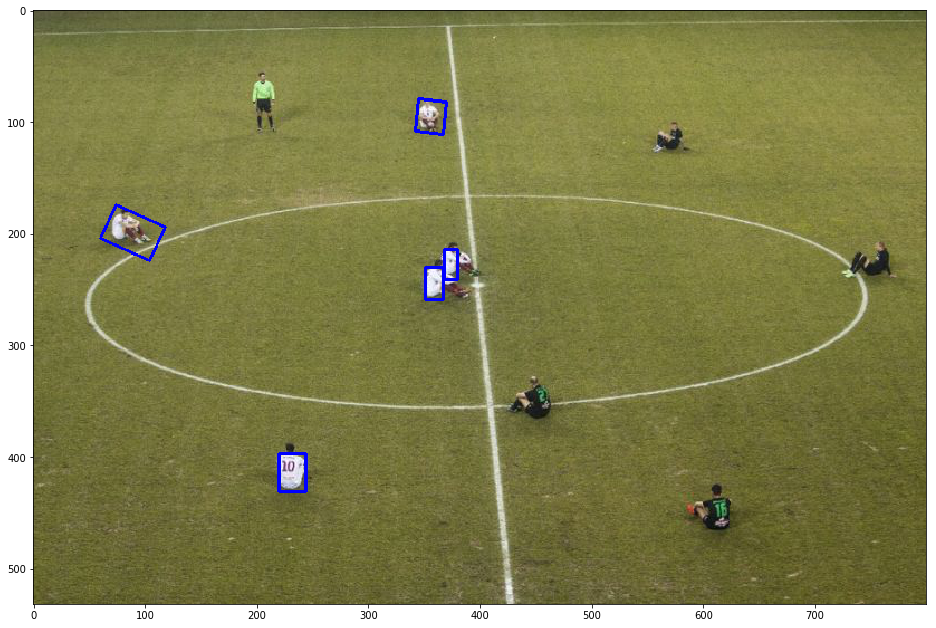

In [176]:
img, contours, hierarchy = cv2.findContours(img_ero, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img = img_football.copy()

contours_football = []
for contour in contours: 
    center, size, angle = cv2.minAreaRect(contour) 
    height, width = size
    area = cv2.contourArea(contour)
    x, y = center;
    if width > 10 and width < 50 and height > 10 and height < 35:
        rect = center, size, angle
        if (size[0] > 25 or size[1] > 25):
            contours_football.append(contour)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            img = cv2.drawContours(img,[box],0,(0,0,255),2)

plt.imshow(img)
print 'Ukupan broj fudbalera u bijelim dresovima: %d' % len(contours_football)